# Cars

> ### $\hat y = a + b*X$
    b = coefficient
    a = intercept

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

# working on a car dataset which contains
- speed(mph)
- stopping distance (ft)

In [2]:
sns.set(color_codes=True)

In [4]:
cars = pd.read_csv('./dataset/cars.csv')
cars.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
speed    50 non-null int64
dist     50 non-null int64
dtypes: int64(2)
memory usage: 880.0 bytes


### Discriptive Stats

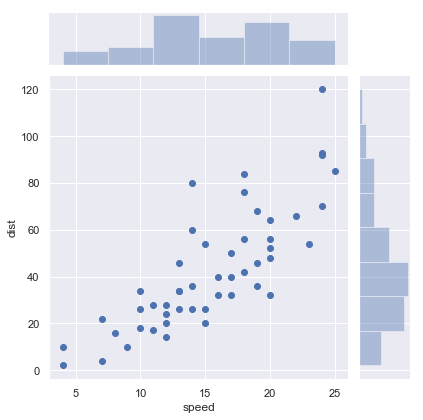

In [8]:
#join plot
#sns.relplot('speed','dist',data=cars,kind='scatter')

sns.jointplot('speed','dist',data=cars,kind='scatter')
plt.show()
# sns.jointplot('Hours','Hits',data=web,kind='kde')
# plt.show()

In [9]:
import statsmodels.formula.api as smf

In [10]:
cars.keys()

Index(['speed', 'dist'], dtype='object')

In [12]:
model = smf.ols(formula="dist~speed",data=cars)
results = model.fit()

In [14]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Sat, 29 Dec 2018   Prob (F-statistic):           1.49e-12
Time:                        10:10:52   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Covariance

In [17]:
cars.cov()

,speed,dist
speed,27.959184,109.946939
dist,109.946939,664.060816


>### Correlation coefficient (*r* )

In [19]:
cars.corr()

,speed,dist
speed,1.000000,0.806895
dist,0.806895,1.000000


In [14]:
results.rsquared

0.41632369094258914

In [15]:
import statsmodels.api as sm

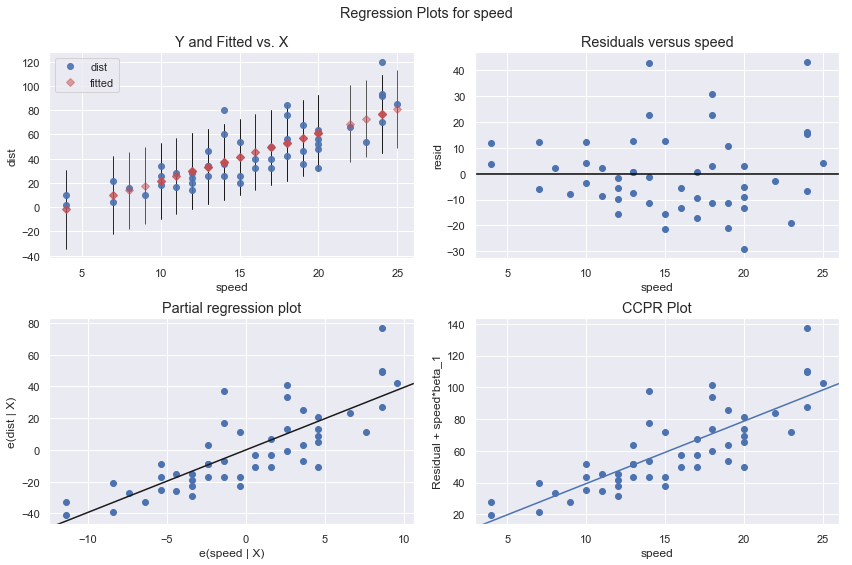

In [22]:
fig = plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(results,'speed',fig=fig)

# Residual Analysis

In [ ]:
res = results.resid

### plotting disribution

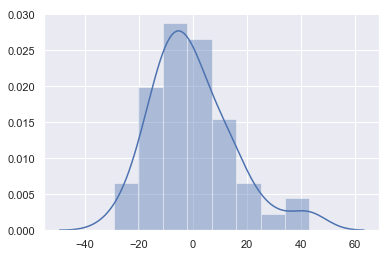

In [26]:
sns.distplot(res)

### Qualtile - Quantile plot

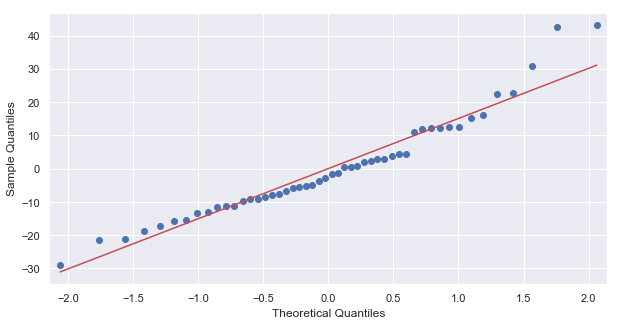

In [27]:
fig,ax = plt.subplots(figsize=(10,5))
fig = sm.graphics.qqplot(res,line='s',ax = ax )

|Condition|P-value|
|-----|----|
|$H_0$ : Normal Distribution | p > 0.05| took all information
|$H_A$ : Not Normal Distribution|p < 0.05| did not all informationa

In [28]:
from scipy import stats
stats.shapiro(res)

(0.9450905919075012, 0.02152460627257824)

In [29]:
sm.stats.diagnostic.kstest_normal(res)

(0.12956840882658271, 0.03528591285877629)

**From above *p*-Value = `0.0215`**
- reject the null-hypothesis -> it is not normal distribution

> Since my distribution is not normal, and linear regression failed to extract all information the model, because data is non linear in nature

# Polynomial Linear Regression

### $y = a + b_1 * X + b_2 *X ^2 + b_3 * X ^3 + ... + b_n * X^n$

> ### Polynomial degree 2

### $y = a + b_1 * X + b_2 *X ^2$

In [33]:
cars['speed_sqr'] = cars['speed']**2
cars.head()

,speed,dist,speed_sqr
0,4,2,16
1,4,10,16
2,7,4,49
3,7,22,49
4,8,16,64


In [35]:
model_p = smf.ols('dist~speed+speed_sqr',data=cars)
result_p = model_p.fit()
result_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     47.14
Date:                Sat, 29 Dec 2018   Prob (F-statistic):           5.85e-12
Time:                        11:38:36   Log-Likelihood:                -205.39
No. Observations:                  50   AIC:                             416.8
Df Residuals:                      47   BIC:                             422.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4701     14.817      0.167      0.868     -27.338      32.278
speed          0.9133      2.034      0.449      0.656      -3.179       5.006
speed_sqr      0.1000      0.066      1.515      0.136      -0.033       0.233
==============================================================================
Omnibus:                       11.173   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.061
Skew:                           0.991   Prob(JB):                      0.00396
Kurtosis:                       4.173   Cond. No.                     2.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

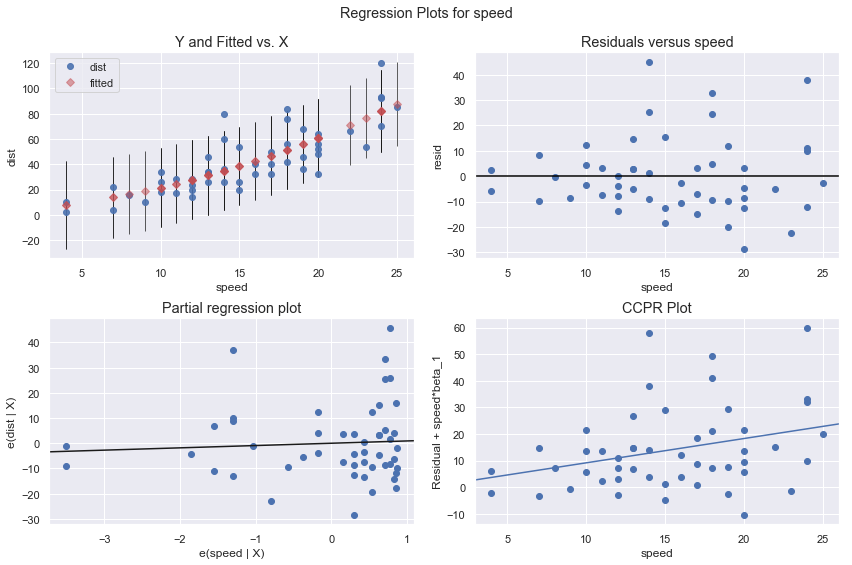

In [37]:
fig = plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(result_p,'speed',fig=fig)

In [40]:
y_hat = 0.1*cars['speed_sqr']
res_2 = y_hat-cars['dist']

In [43]:
x=cars['speed']

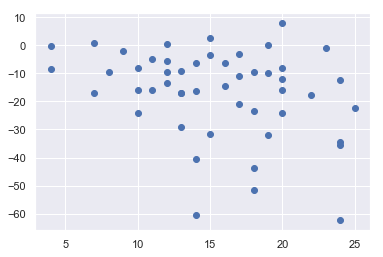

In [46]:
plt.scatter(cars['speed'],res_2)

In [47]:
stats.shapiro(res_2)

(0.9031317830085754, 0.0006106556975282729)

In [49]:
cars['speed_cub']=cars['speed']**3

In [50]:
cars.head()

,speed,dist,speed_sqr,speed_cub
0,4,2,16,64
1,4,10,16,64
2,7,4,49,343
3,7,22,49,343
4,8,16,64,512


In [52]:
model3=smf.ols('dist~speed+speed_sqr+speed_cub',data=cars)
result_p3 = model3.fit()
result_p3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     31.58
Date:                Sat, 29 Dec 2018   Prob (F-statistic):           3.07e-11
Time:                        11:58:39   Log-Likelihood:                -204.94
No. Observations:                  50   AIC:                             417.9
Df Residuals:                      46   BIC:                             425.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.5050     28.405     -0.687      0.496     -76.682      37.672
speed          6.8011      6.801      1.000      0.323      -6.889      20.491
speed_sqr     -0.3497      0.500     -0.699      0.488      -1.356       0.657
speed_cub      0.0103      0.011      0.907      0.369      -0.012       0.033
==============================================================================
Omnibus:                       11.647   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.650
Skew:                           1.037   Prob(JB):                      0.00295
Kurtosis:                       4.136   Cond. No.                     8.75e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
pd.DataFrame({'speed':[20]})

,speed
0,20


In [59]:
results.predict(pd.DataFrame({'speed':[20]}))

0    61.06908
dtype: float64

AttributeError: 'OLSResults' object has no attribute 'shape'

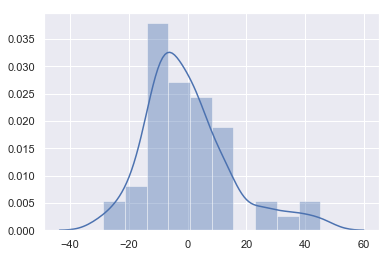

In [36]:
res1 = result_p.resid
sns.distplot(res1)
sm.graphics.qqplot(result_p,line='s')

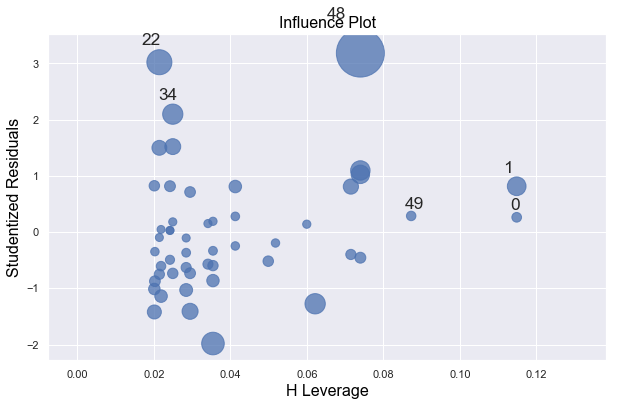

In [31]:
fig,ax = plt.subplots(figsize=(10,6))
fig =sm.graphics.influence_plot(results,ax=ax)

# Leverage

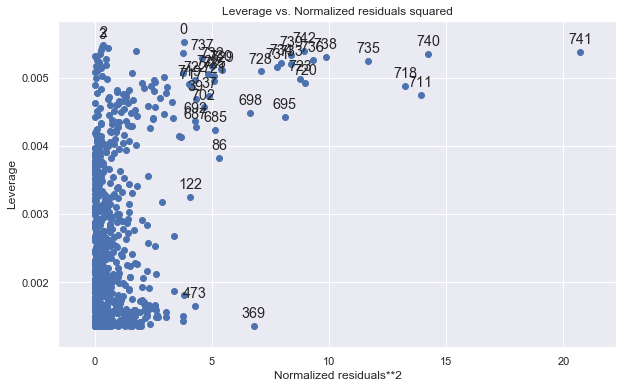

In [22]:
fig,ax = plt.subplots(figsize=(10,6))
fig =sm.graphics.plot_leverage_resid2(results,ax=ax)

In [23]:
# 3 USD
# hits = 989+2.59*Hours
hits = 100000
hours = (hits - 989) / 2.59
print('It will take around = {} hr'.format(hours))

It will take around = 38228.18532818533 hr


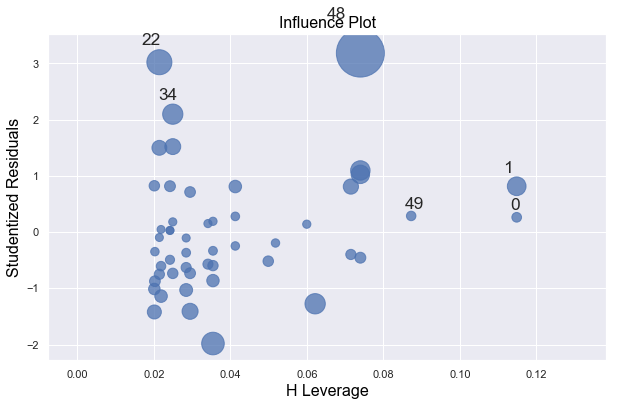

In [30]:
fig,ax = plt.subplots(figsize=(10,6))
fig =sm.graphics.influence_plot(results,ax=ax)

In [24]:
38228.18/(24*7*52)

4.375936355311356

(Text(0.5,0,'x'), Text(0,0.5,'x^3'))

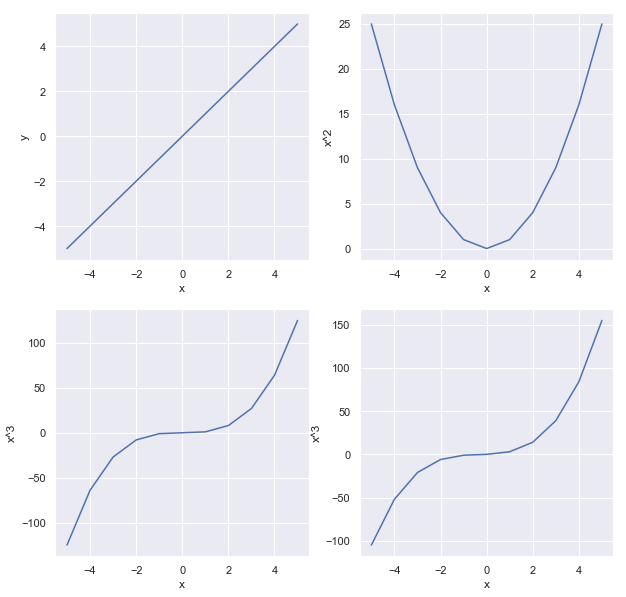

In [25]:
# 
x = np.arange(-5,6)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(x,x)
plt.xlabel('x'),plt.ylabel('y')

plt.subplot(2,2,2)
plt.plot(x,x**2)
plt.xlabel('x'),plt.ylabel('x^2')

plt.subplot(2,2,3)
plt.plot(x,x**3)
plt.xlabel('x'),plt.ylabel('x^3')


plt.subplot(2,2,4)
plt.plot(x,x+x**2+x**3)
plt.xlabel('x'),plt.ylabel('x^3')

In [27]:
web.head()

,Hours,Hits
0,1,2272.0
2,3,1386.0
3,4,1365.0
4,5,1488.0
5,6,1337.0


In [28]:
web2 = web.copy()
web2 = web2[['Hits','Hours']]
web2.head()

,Hits,Hours
0,2272.0,1
2,1386.0,3
3,1365.0,4
4,1488.0,5
5,1337.0,6


In [29]:
web2['Hours_sqr'] = web2['Hours'] **2
web2.head()

,Hits,Hours,Hours_sqr
0,2272.0,1,1
2,1386.0,3,9
3,1365.0,4,16
4,1488.0,5,25
5,1337.0,6,36


In [30]:
model2 = smf.ols('Hits~Hours+Hours_sqr',data=web2)

In [31]:
results = model2.fit()

In [32]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Hits   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     739.8
Date:                Wed, 26 Dec 2018   Prob (F-statistic):          1.78e-176
Time:                        11:37:39   Log-Likelihood:                -5603.0
No. Observations:                 735   AIC:                         1.121e+04
Df Residuals:                     732   BIC:                         1.123e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1974.7608     55.694     35.457      0.0

In [33]:
results.params

Intercept    1974.760817
Hours          -5.265457
Hours_sqr       0.010532
dtype: float64

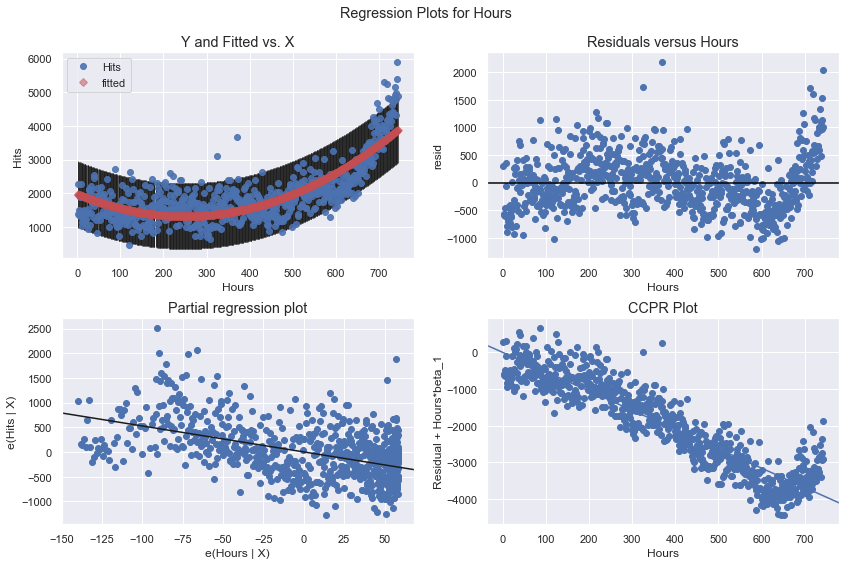

In [34]:
fig = plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(results,'Hours',fig=fig)

(0.03941586712847511, 0.008784225864692756)

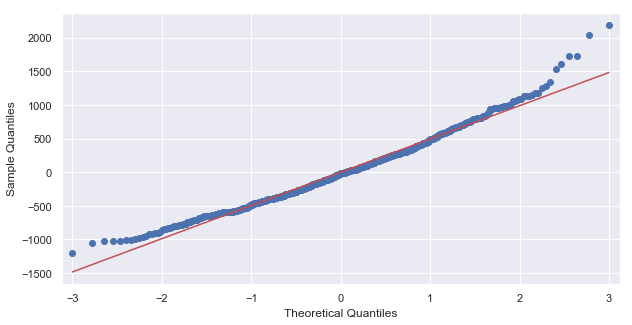

In [35]:
res = results.resid

fig,ax = plt.subplots(figsize=(10,5))
fig = sm.graphics.qqplot(res,line='s',ax = ax )
stats.shapiro(res)

sm.stats.diagnostic.kstest_normal(res)

In [36]:
web2['Hours_cube'] = web2['Hours']**3

In [37]:
web2.head()

,Hits,Hours,Hours_sqr,Hours_cube
0,2272.0,1,1,1
2,1386.0,3,9,27
3,1365.0,4,16,64
4,1488.0,5,25,125
5,1337.0,6,36,216


In [38]:
model3 = smf.ols('Hits~Hours+Hours_sqr+Hours_cube',data=web2)
result3 =model3.fit()

In [39]:
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                   Hits   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     707.2
Date:                Wed, 26 Dec 2018   Prob (F-statistic):          1.40e-215
Time:                        11:45:06   Log-Likelihood:                -5509.0
No. Observations:                 735   AIC:                         1.103e+04
Df Residuals:                     731   BIC:                         1.104e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1333.2880     65.843     20.249      0.0

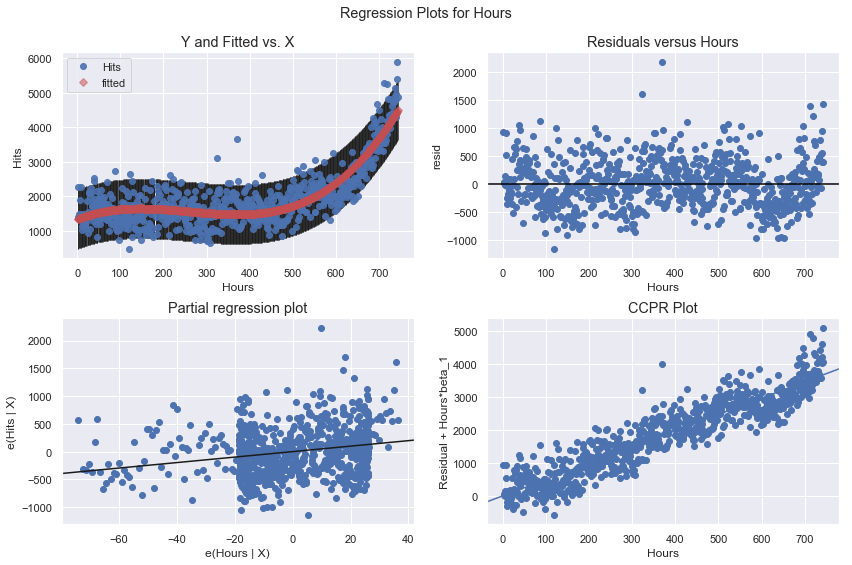

In [40]:
fig = plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(result3,'Hours',fig=fig)

(0.03669803422701401, 0.020218540727637718)

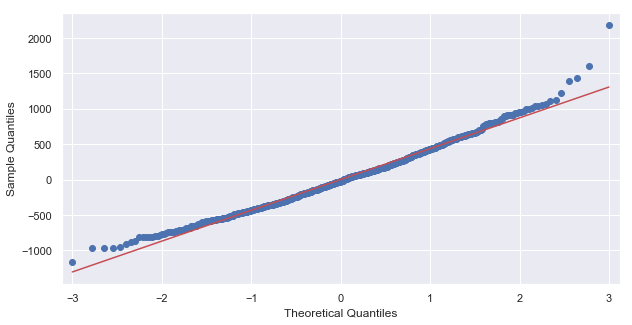

In [42]:
res = result3.resid

fig,ax = plt.subplots(figsize=(10,5))
fig = sm.graphics.qqplot(res,line='s',ax = ax )
stats.shapiro(res)

sm.stats.diagnostic.kstest_normal(res)

In [43]:
result3.params

Intercept     1333.287965
Hours            4.942260
Hours_sqr       -0.023589
Hours_cube       0.000030
dtype: float64

In [44]:
v = [0.000030,-0.023589,4.942260,1333.28796]
np.roots(v)

array([ 466.71311433+290.26255298j,  466.71311433-290.26255298j,
       -147.12622866  +0.j        ])

In [45]:
np.sqrt(466**2+290**2)

548.8679258255122

In [46]:
548/(24*7)

3.261904761904762

In [47]:
res3 = result3.resid

In [48]:
sm.stats.diagnostic.kstest_normal(res3)

(0.03669803422701401, 0.020218540727637718)

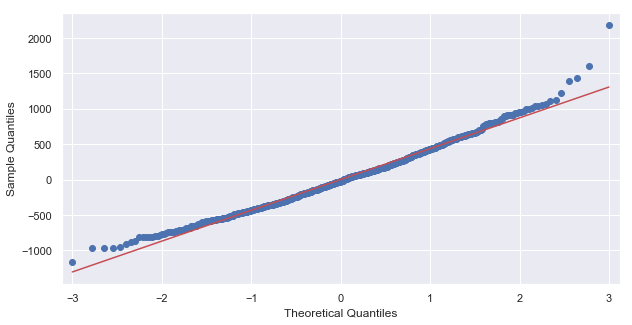

In [49]:
fig,ax = plt.subplots(figsize=(10,5))
fig = sm.graphics.qqplot(res3,line='s',ax = ax )

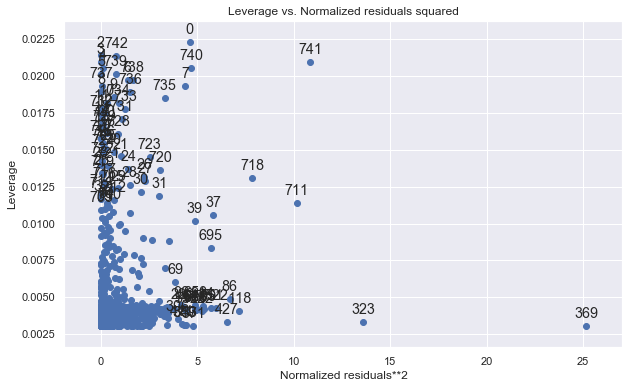

In [50]:
fig,ax = plt.subplots(figsize=(10,6))
fig = sm.graphics.plot_leverage_resid2(result3,ax=ax)

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
fig = sm.graphics.influence_plot(result3,ax=ax)